In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import sqlite3

In [281]:
conn = sqlite3.connect('/Users/um/Desktop/Wild Code School/Top_gun/Datasets/top_gun_data_1.db')

In [282]:
df_aeronefs = pd.read_sql_query('select * from aeronefs', conn)
df_composants = pd.read_sql_query('select * from composants', conn)
df_degradations = pd.read_sql_query('select * from degradations', conn)
df_logs_vols = pd.read_sql_query('select * from logs_vols', conn)

In [283]:
df_degradations['measure_day'].isnull().sum()

0

# Téléchargement des datasets via la base sql.

In [284]:
display(df_aeronefs.head(1))
display(df_composants.head(1))
display(df_degradations.head(1))
display(df_logs_vols.head(1))

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6353,E170,2000-03-17,2024-03-27,0,1970-01-01


,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
0,REAE170-E170_6353-0,2,E170_6353,Réacteur gauche,13045.0,53.308375,15552.0


,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement
0,D003661,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0


,ref_vol,aero_linked,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²
0,V07679725,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116


In [322]:
df_aeronefs

,id_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6353,E170,2000-03-17,2024-03-27,0,1970-01-01
1,B767_2803,B767,2020-12-03,2024-06-01,0,1970-01-01
2,CRJ700_6943,CRJ700,2015-01-29,2024-06-02,1,2024-06-03
3,A350_1177,A350,2005-08-07,2024-01-04,0,1970-01-01
4,B777_4029,B777,2009-01-01,2024-06-01,0,1970-01-01
...,...,...,...,...,...,...
225,A350_6305,A350,2009-03-09,2024-06-01,0,1970-01-01
226,B737_4369,B737,2010-01-05,2024-06-01,0,1970-01-01
227,A340_4021,A340,2004-12-13,2024-05-31,0,1970-01-01
228,CRJ900_1740,CRJ900,2003-07-20,2024-06-01,0,1970-01-01


In [323]:
df_composants

,ref_compo,categorie,id_aero,desc,lifespan,taux_usure_actuel,cout
0,REAE170-E170_6353-0,2,E170_6353,Réacteur gauche,13045.0,53.308375,15552.0
1,REAE170-E170_6353-1,2,E170_6353,Réacteur droit,13626.0,50.111950,17559.0
2,SYSE170-E170_6353-2,2,E170_6353,Système de navigation,10541.0,16.730575,16514.0
3,ORDE170-E170_6353-3,2,E170_6353,Ordinateur de vol,10441.0,6.653075,16047.0
4,AUTE170-E170_6353-4,2,E170_6353,Autopilote,14847.0,42.033525,19362.0
...,...,...,...,...,...,...,...
10345,SYSCRJ700-CRJ700_2988-40,0,CRJ700_2988,Systèmes d'oxygène d'urgence,13038.0,53.323168,4745.0
10346,PORCRJ700-CRJ700_2988-41,0,CRJ700_2988,Portes passagers,13107.0,16.392552,3053.0
10347,HUBCRJ700-CRJ700_2988-42,0,CRJ700_2988,Hublots,68978.0,34.551008,3593.0
10348,ECLCRJ700-CRJ700_2988-43,0,CRJ700_2988,Éclairage de la cabine,10639.0,36.706904,4965.0


In [309]:
df_aeronefs['en_maintenance'].sort_index().value_counts()

en_maintenance
0    215
1     15
Name: count, dtype: int64

In [285]:
df_degradations.isnull().sum()

ref_deg             0
linked_aero         0
compo_concerned     0
usure_nouvelle      0
measure_day         0
need_replacement    0
dtype: int64

# Renommage des colonnes pour faciliter la jointure.

In [286]:
df_aeronefs.rename(columns={"ref_aero": "id_aero"}, inplace=True)
df_composants.rename(columns={"aero": "id_aero"}, inplace=True)
df_degradations.rename(columns={"linked_aero": "id_aero","compo_concerned" : "ref_compo"}, inplace=True)
df_logs_vols.rename(columns={"aero_linked": "id_aero"}, inplace=True)

In [287]:
data = pd.merge(df_degradations, df_logs_vols, on='id_aero', how='left')

In [288]:
data = pd.merge(data, df_composants, on='ref_compo', how = 'left')

In [289]:
data.duplicated().sum()

0

In [290]:
"""
je choisi de droper les colonnes qui ne me seront pas utiles à ce niveau : ref_deg, id_aero_y, measure_day, ref_vol.
je renomme la colonne usure_nouvelle par usure_cumulée, afin d'avoir une meilleure compréhension du dataset.
le fichier data = df_degradations + df_logs_vols + df_composants.
le fichier qui en résulte fait 479205 lignes.
"""

"\nje choisi de droper les colonnes qui ne me seront pas utiles à ce niveau : ref_deg, id_aero_y, measure_day, ref_vol.\nje renomme la colonne usure_nouvelle par usure_cumulée, afin d'avoir une meilleure compréhension du dataset.\nle fichier data = df_degradations + df_logs_vols + df_composants.\nle fichier qui en résulte fait 479205 lignes.\n"

In [291]:
data.drop(columns = ['ref_deg', 'id_aero_y', 'ref_vol'], inplace = True)

In [292]:
data.rename(columns={"usure_nouvelle": "usure_cumulée",
                     "id_aero_x": "id_aero",
                     }, inplace=True)

In [311]:
pd.set_option('display.max_columns', None)
data.head(10)

,id_aero,ref_compo,usure_cumulée,measure_day,need_replacement,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²,categorie,desc,lifespan,taux_usure_actuel,cout
0,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0,2024-06-04,6.9,0,-2.2,980.7,1.235,2,Réacteur gauche,13045.0,53.308375,15552.0
1,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0,2024-06-06,1.8,0,2.9,953.5,0.942,2,Réacteur gauche,13045.0,53.308375,15552.0
2,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0,2024-06-07,9.9,1,-12.4,918.2,3.568,2,Réacteur gauche,13045.0,53.308375,15552.0
3,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0,2024-06-11,6.7,0,1.7,944.9,3.377,2,Réacteur gauche,13045.0,53.308375,15552.0
4,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0,2024-06-12,6.9,0,3.7,984.5,4.178,2,Réacteur gauche,13045.0,53.308375,15552.0
5,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0,2024-06-16,9.0,1,-34.6,836.7,1.176,2,Réacteur gauche,13045.0,53.308375,15552.0
6,E170_6353,REAE170-E170_6353-1,50.0,2024-06-01,0,2024-06-04,6.9,0,-2.2,980.7,1.235,2,Réacteur droit,13626.0,50.111950,17559.0
7,E170_6353,REAE170-E170_6353-1,50.0,2024-06-01,0,2024-06-06,1.8,0,2.9,953.5,0.942,2,Réacteur droit,13626.0,50.111950,17559.0
8,E170_6353,REAE170-E170_6353-1,50.0,2024-06-01,0,2024-06-07,9.9,1,-12.4,918.2,3.568,2,Réacteur droit,13626.0,50.111950,17559.0
9,E170_6353,REAE170-E170_6353-1,50.0,2024-06-01,0,2024-06-11,6.7,0,1.7,944.9,3.377,2,Réacteur droit,13626.0,50.111950,17559.0


In [310]:
data['etat_voyant'].value_counts() 

etat_voyant
0    419760
1     58410
3       585
2       450
Name: count, dtype: int64

In [294]:
date_columns = ['measure_day', 'jour_vol']
data[date_columns] = data[date_columns].apply(pd.to_datetime)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479205 entries, 0 to 479204
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id_aero             479205 non-null  object        
 1   ref_compo           479205 non-null  object        
 2   usure_cumulée       479205 non-null  float64       
 3   measure_day         479205 non-null  datetime64[ns]
 4   need_replacement    479205 non-null  int64         
 5   jour_vol            479205 non-null  datetime64[ns]
 6   time_en_air         479205 non-null  float64       
 7   etat_voyant         479205 non-null  int64         
 8   temp en °C          479205 non-null  float64       
 9   pressure en hPa     479205 non-null  float64       
 10  vibrations en m/s²  479205 non-null  float64       
 11  categorie           479205 non-null  int64         
 12  desc                479205 non-null  object        
 13  lifespan            479205 no

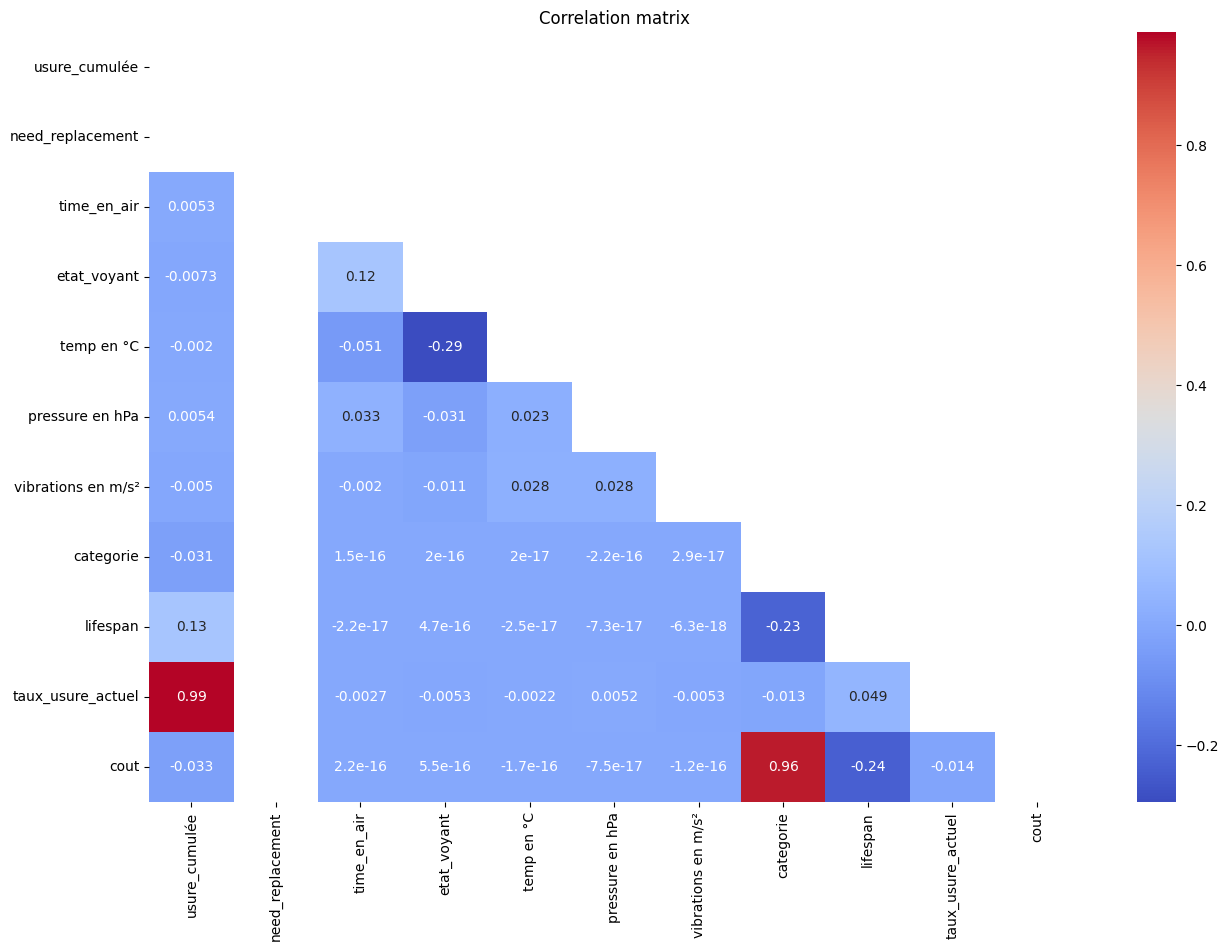

In [295]:
plt.figure(figsize=(15,10))
mumeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
matrix = data[mumeric_columns].corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, cmap='coolwarm', mask = mask)
plt.title('Correlation matrix')
plt.show()

In [296]:
data['ref_compo'].nunique()

10350

In [315]:
data[data['id_aero'] == 'E170_6353'].sort_values(by='jour_vol', ascending=False).head(44)

,id_aero,ref_compo,usure_cumulée,measure_day,need_replacement,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²,categorie,desc,lifespan,taux_usure_actuel,cout
438614,E170_6353,SYSE170-E170_6353-44,27.0,2024-06-16,0,2024-06-16,9.0,1,-34.6,836.7,1.176,0,Système d'approvisionnement en eau,12796.0,21.509700,4701.0
308132,E170_6353,SYSE170-E170_6353-2,19.0,2024-06-11,0,2024-06-16,9.0,1,-34.6,836.7,1.176,2,Système de navigation,10541.0,16.730575,16514.0
308144,E170_6353,AUTE170-E170_6353-4,46.0,2024-06-11,0,2024-06-16,9.0,1,-34.6,836.7,1.176,2,Autopilote,14847.0,42.033525,19362.0
329876,E170_6353,GOUE170-E170_6353-26,35.0,2024-06-12,0,2024-06-16,9.0,1,-34.6,836.7,1.176,1,Gouvernail de direction,12643.0,31.348225,12059.0
167492,E170_6353,SYSE170-E170_6353-7,27.0,2024-06-06,0,2024-06-16,9.0,1,-34.6,836.7,1.176,2,Système de communication radio,10370.0,26.167750,19214.0
89291,E170_6353,REAE170-E170_6353-1,51.0,2024-06-04,0,2024-06-16,9.0,1,-34.6,836.7,1.176,2,Réacteur droit,13626.0,50.111950,17559.0
329882,E170_6353,SYSE170-E170_6353-27,9.0,2024-06-12,0,2024-06-16,9.0,1,-34.6,836.7,1.176,1,Système de pressurisation,11338.0,5.750350,13233.0
308138,E170_6353,ORDE170-E170_6353-3,9.0,2024-06-11,0,2024-06-16,9.0,1,-34.6,836.7,1.176,2,Ordinateur de vol,10441.0,6.653075,16047.0
329888,E170_6353,SYSE170-E170_6353-28,5.0,2024-06-12,0,2024-06-16,9.0,1,-34.6,836.7,1.176,1,Système de conditionnement d'air,10343.0,2.155725,13453.0
89285,E170_6353,REAE170-E170_6353-0,54.0,2024-06-04,0,2024-06-16,9.0,1,-34.6,836.7,1.176,2,Réacteur gauche,13045.0,53.308375,15552.0


In [297]:
data[data['ref_compo'] == 'REAE170-E170_6353-0']

,id_aero,ref_compo,usure_cumulée,measure_day,need_replacement,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²,categorie,desc,lifespan,taux_usure_actuel,cout
0,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0,2024-06-04,6.9,0,-2.2,980.7,1.235,2,Réacteur gauche,13045.0,53.308375,15552.0
1,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0,2024-06-06,1.8,0,2.9,953.5,0.942,2,Réacteur gauche,13045.0,53.308375,15552.0
2,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0,2024-06-07,9.9,1,-12.4,918.2,3.568,2,Réacteur gauche,13045.0,53.308375,15552.0
3,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0,2024-06-11,6.7,0,1.7,944.9,3.377,2,Réacteur gauche,13045.0,53.308375,15552.0
4,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0,2024-06-12,6.9,0,3.7,984.5,4.178,2,Réacteur gauche,13045.0,53.308375,15552.0
5,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0,2024-06-16,9.0,1,-34.6,836.7,1.176,2,Réacteur gauche,13045.0,53.308375,15552.0
89280,E170_6353,REAE170-E170_6353-0,54.0,2024-06-04,0,2024-06-04,6.9,0,-2.2,980.7,1.235,2,Réacteur gauche,13045.0,53.308375,15552.0
89281,E170_6353,REAE170-E170_6353-0,54.0,2024-06-04,0,2024-06-06,1.8,0,2.9,953.5,0.942,2,Réacteur gauche,13045.0,53.308375,15552.0
89282,E170_6353,REAE170-E170_6353-0,54.0,2024-06-04,0,2024-06-07,9.9,1,-12.4,918.2,3.568,2,Réacteur gauche,13045.0,53.308375,15552.0
89283,E170_6353,REAE170-E170_6353-0,54.0,2024-06-04,0,2024-06-11,6.7,0,1.7,944.9,3.377,2,Réacteur gauche,13045.0,53.308375,15552.0


# ici je choisi de masquer les dates inférieures à 2024-05-01 volontairement pour eviter les variations inexpliquées des taux d'usures

In [298]:
#data = data[data['measure_day'] >= '2024-05-01']

# ici je choisi de ranger les taux d'usure par catégories de composants : 

In [299]:
data_categorie_0 = pd.DataFrame(data[data['categorie'] == 0].groupby('measure_day')['usure_cumulée'].mean())
data_categorie_1 = pd.DataFrame(data[data['categorie'] == 1].groupby('measure_day')['usure_cumulée'].mean())
data_categorie_2 = pd.DataFrame(data[data['categorie'] == 2].groupby('measure_day')['usure_cumulée'].mean())

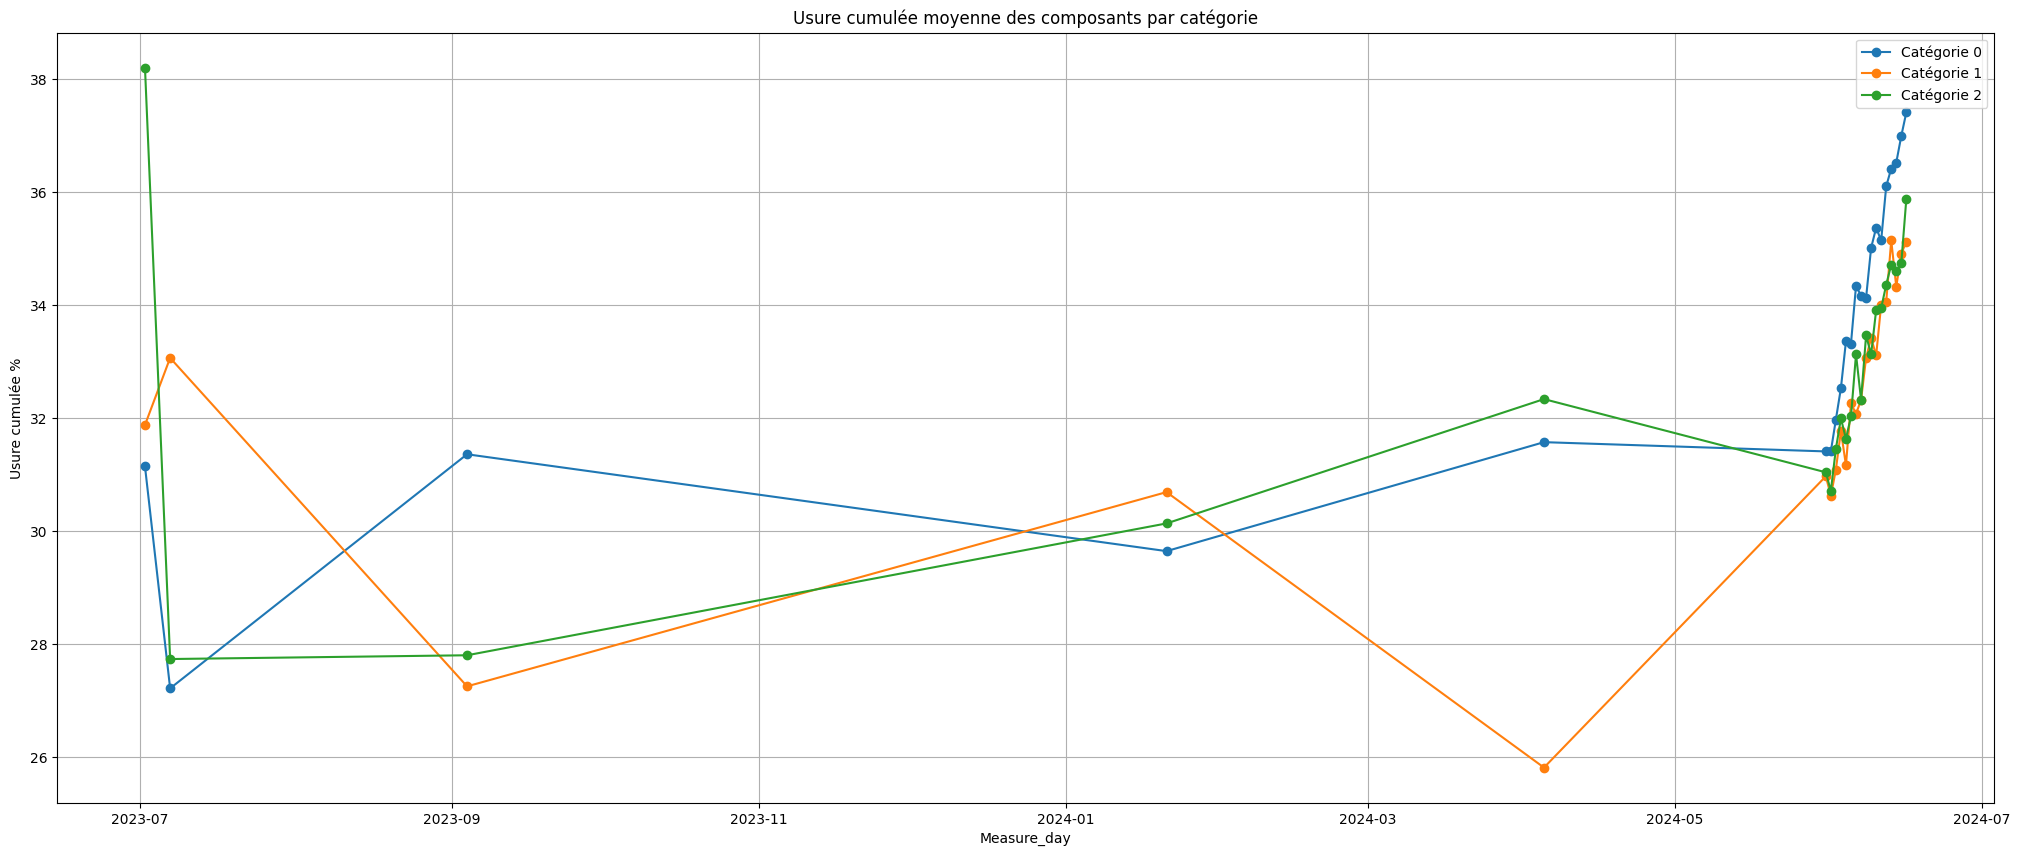

In [300]:
data_list = [data_categorie_0, data_categorie_1, data_categorie_2]
plt.figure(figsize=(25, 10))

for i, data_categorie in enumerate(data_list):
    if 'usure_cumulée' in data_categorie.columns:
        plt.plot(data_categorie.index, data_categorie['usure_cumulée'], marker='o', label=f'Catégorie {i}')
    else:
        print(f"Le DataFrame de la catégorie {i} ne contient pas la colonne 'usure_cumulée'")

plt.xlabel('Measure_day')
plt.ylabel('Usure cumulée %')
plt.title('Usure cumulée moyenne des composants par catégorie')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


In [301]:
"""
une prediction du taux d'usure cumulée peut être réalisée par catéorie de composants.
avec une regression linéraire multiple.
Par ailleurs un modlèle de régression linéaire peut être utilisé pour chacun des composants
    
    
"""

"\nune prediction du taux d'usure cumulée peut être réalisée par catéorie de composants.\navec une regression linéraire multiple.\nPar ailleurs un modlèle de régression linéaire peut être utilisé pour chacun des composants\n    \n    \n"

In [302]:
def usure_composant(data, ref_compo):
    """
    Fonction permettant de réaliser un tracé l'usure cumulée d'un composant.

    Parameters:
    data (DataFrame): DataFrame contenant les données de mesure.
    ref_compo (str): Référence du composant à tracer.
    
    """
    if ref_compo not in data['ref_compo'].values:
        print(f"Référence du composant {ref_compo} non trouvée dans les données.")
        return
    compo_data = data[data['ref_compo'] == ref_compo]

    if compo_data.empty:
        print(f"Aucune donnée trouvée pour la référence du composant {ref_compo}.")
        return
    plt.figure(figsize=(25, 10))
    plt.plot(compo_data['measure_day'], compo_data['usure_cumulée'], label=compo_data['desc'].iloc[0])
    plt.xlabel('Jour de mesure')
    plt.ylabel('Usure cumulée (%)')
    plt.title(f'Usure cumulée pour le composant {ref_compo}')
    plt.legend()
    plt.grid(True)
    plt.show()



In [303]:
def comparaison_usure(data, ref_compo_1, ref_compo_2):
    """
    Fonction permettant de réaliser un tracé de la usure cumulée de deux composants.

    Parameters:
    data (DataFrame): DataFrame contenant les données de mesure.
    ref_compo_1 (str): Référence du premier composant à tracer.
    ref_compo_2 (str): Référence du deuxième composant à tracer.
    """

    if ref_compo_1 not in data['ref_compo'].values:
        print(f"Référence du composant {ref_compo_1} non trouvée dans les données.")
        return
    if ref_compo_2 not in data['ref_compo'].values:
        print(f"Référence du composant {ref_compo_2} non trouvée dans les données.")
        return
    compo_data_1 = data[data['ref_compo'] == ref_compo_1]
    compo_data_2 = data[data['ref_compo'] == ref_compo_2]

    if compo_data_1.empty:
        print(f"Aucune donnée trouvée pour la référence du composant {ref_compo_1}.")
        return
    if compo_data_2.empty:
        print(f"Aucune donnée trouvée pour la référence du composant {ref_compo_2}.")
        return

    plt.figure(figsize=(25, 10))
    plt.plot(compo_data_1['measure_day'], compo_data_1['usure_cumulée'], label=compo_data_1['desc'].iloc[0])
    plt.plot(compo_data_2['measure_day'], compo_data_2['usure_cumulée'], label=compo_data_2['desc'].iloc[0])
    plt.legend()
    plt.grid(True)
    plt.xlabel('Jour de mesure')
    plt.ylabel('Usure cumulée (%)')
    plt.title(f'Usure cumulée de {ref_compo_1} et {ref_compo_2}')
    plt.show()


In [304]:
data['ref_compo'].to_list()

['REAE170-E170_6353-0',
 'REAE170-E170_6353-0',
 'REAE170-E170_6353-0',
 'REAE170-E170_6353-0',
 'REAE170-E170_6353-0',
 'REAE170-E170_6353-0',
 'REAE170-E170_6353-1',
 'REAE170-E170_6353-1',
 'REAE170-E170_6353-1',
 'REAE170-E170_6353-1',
 'REAE170-E170_6353-1',
 'REAE170-E170_6353-1',
 'SYSE170-E170_6353-2',
 'SYSE170-E170_6353-2',
 'SYSE170-E170_6353-2',
 'SYSE170-E170_6353-2',
 'SYSE170-E170_6353-2',
 'SYSE170-E170_6353-2',
 'ORDE170-E170_6353-3',
 'ORDE170-E170_6353-3',
 'ORDE170-E170_6353-3',
 'ORDE170-E170_6353-3',
 'ORDE170-E170_6353-3',
 'ORDE170-E170_6353-3',
 'AUTE170-E170_6353-4',
 'AUTE170-E170_6353-4',
 'AUTE170-E170_6353-4',
 'AUTE170-E170_6353-4',
 'AUTE170-E170_6353-4',
 'AUTE170-E170_6353-4',
 'SYSE170-E170_6353-5',
 'SYSE170-E170_6353-5',
 'SYSE170-E170_6353-5',
 'SYSE170-E170_6353-5',
 'SYSE170-E170_6353-5',
 'SYSE170-E170_6353-5',
 'RADE170-E170_6353-6',
 'RADE170-E170_6353-6',
 'RADE170-E170_6353-6',
 'RADE170-E170_6353-6',
 'RADE170-E170_6353-6',
 'RADE170-E170_6

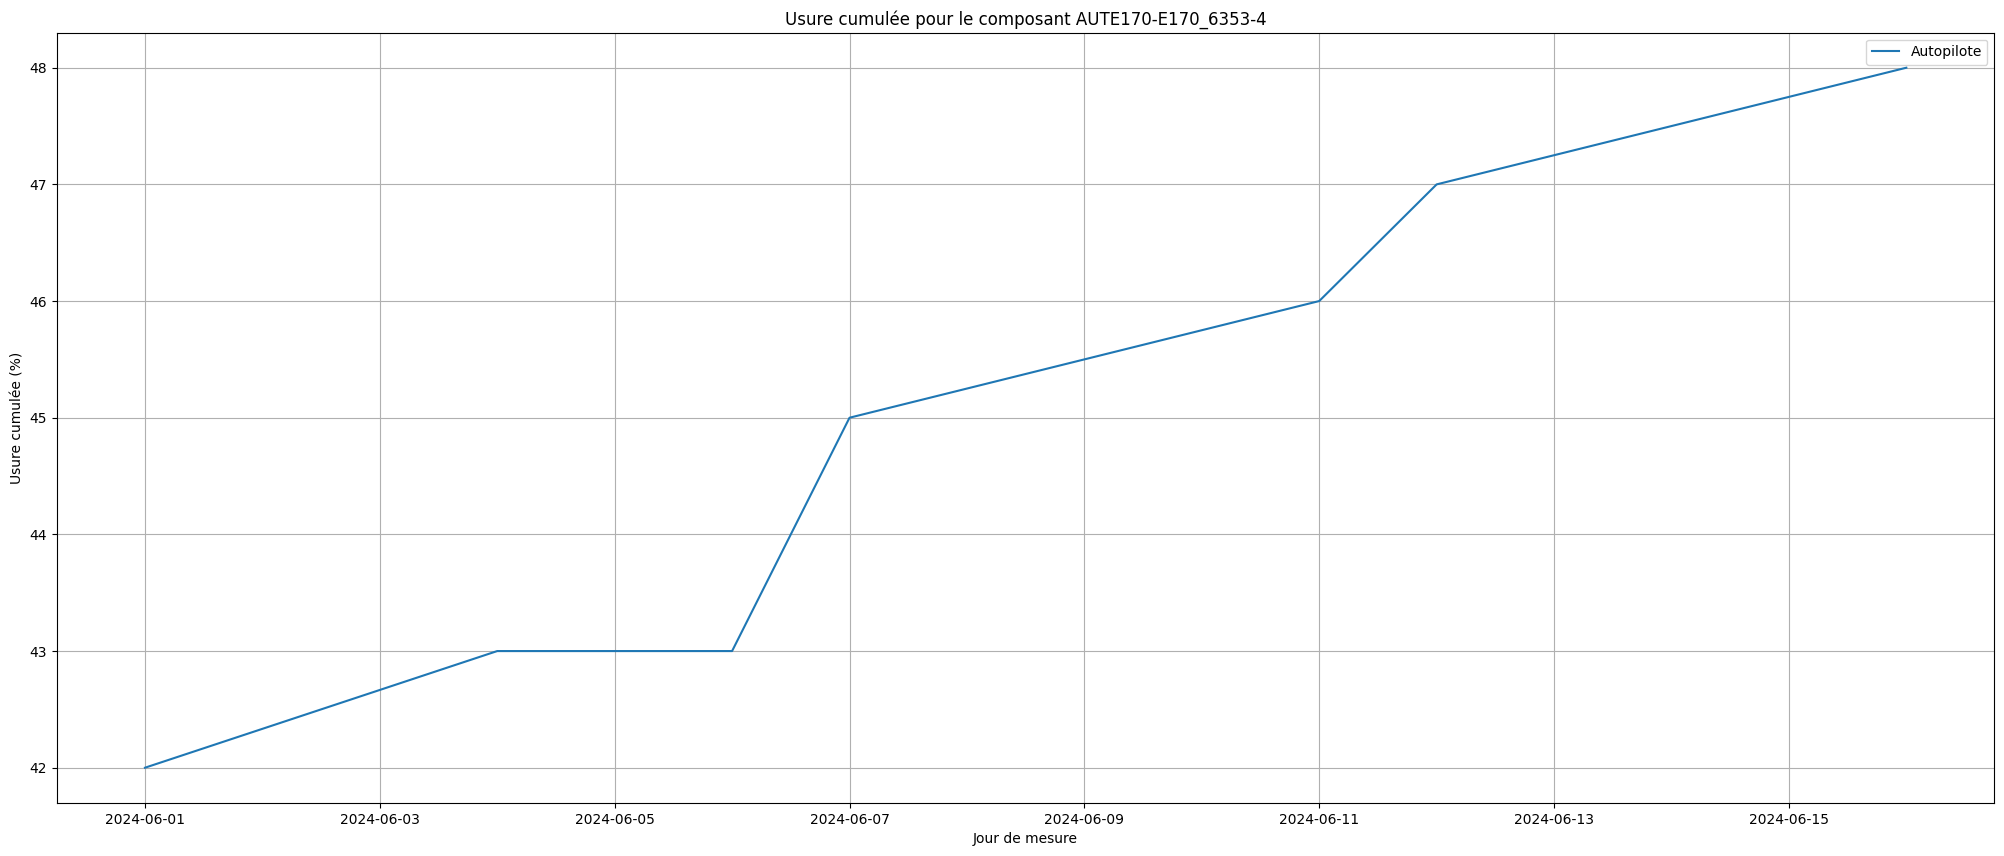

In [305]:
usure_composant(data,'AUTE170-E170_6353-4')

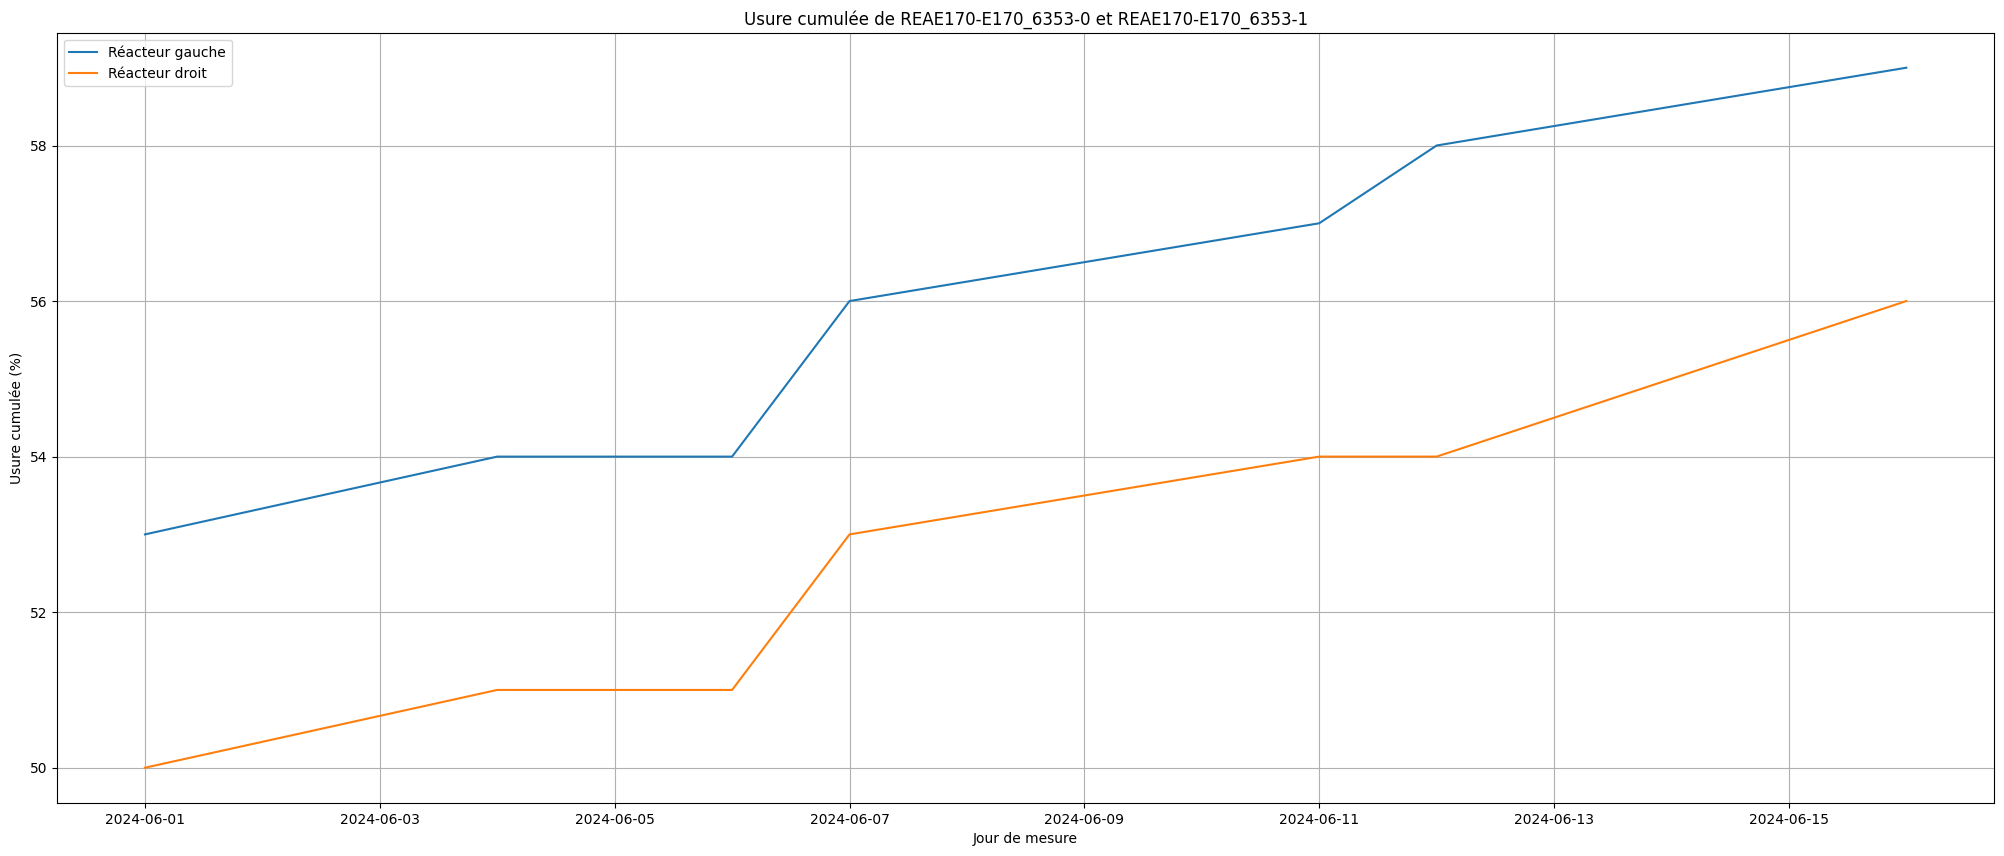

In [306]:
comparaison_usure(data, 'REAE170-E170_6353-0', 'REAE170-E170_6353-1')

In [ ]:
"""


"""